In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sympy as smp
from sympy import DiracDelta
from skimage import color
from skimage import io
from scipy.fft import fftfreq
from scipy.fft import fft, ifft, fft2, ifft2

In [22]:
T = 10
N = 500
t = np.linspace(0, T, N)
dt = np.diff(t)[0]

In [23]:
dt

0.02004008016032064

In [4]:
f1 = 20/(N*dt)
f2 = 10/(N*dt)
f3 = (10+5*N)/(N*dt)
f4 = 1/(2*np.pi)
f5 = 1
w = 2*np.pi*f5
w

6.283185307179586

In [5]:
x1 = 3*np.cos(w*t)+5*np.cos(3*w*t)+8*np.cos(7*w*t)
x2 = 3*np.sin(w*t)+2*np.sin(3*w*t)+3*np.sin(8*w*t)

Text(0.5, 1.0, 'x2: 3sin(wt) + 2sin(3wt) + 3sin(8wt)')

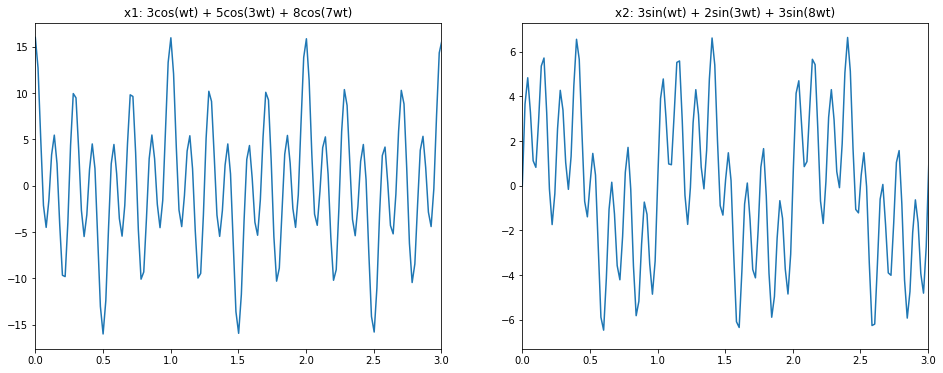

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
#plt.figure(figsize=(12,6))
ax1.plot(t,x1)
ax1.set_xlim(0,3)
ax1.set_title("x1: 3cos(wt) + 5cos(3wt) + 8cos(7wt)")
ax2.plot(t,x2)
ax2.set_xlim(0,3)
ax2.set_title("x2: 3sin(wt) + 2sin(3wt) + 3sin(8wt)")

### Transformadas de fourier de x1 y x2

In [7]:
freq = fftfreq(len(t), np.diff(t)[0])
x1_FFT = fft(x1)
x2_FFT = fft(x2)
#x_FFTSHIFT = fftshift(x_FFT)

### [Resultado analítico] Con f = 1 (w = 2*pi) [x1 (Cos)]
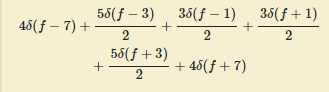
Delta de dirac = inf en 7, -7, 3, -3, 1, -1

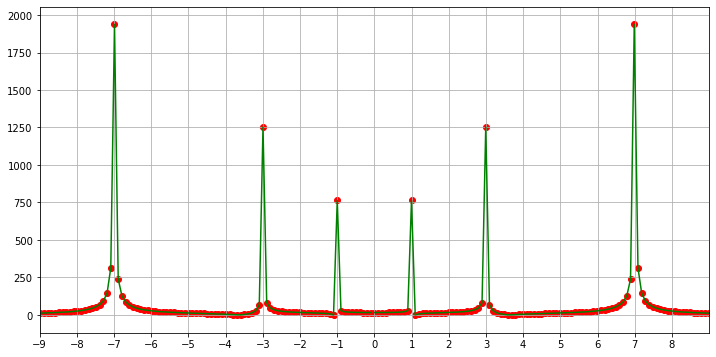

In [29]:
plt.figure(figsize=(12,6))
plt.plot(freq[:N//2],np.abs(x1_FFT[:N//2]), 'g-')
plt.scatter(freq[:N//2],np.abs(x1_FFT[:N//2]), color='red') 

plt.plot(freq[N//2:],np.abs(x1_FFT[N//2:]), 'g-')
plt.scatter(freq[N//2:],np.abs(x1_FFT[N//2:]), color='red')
plt.xlim(-9,9)
plt.xticks(np.arange(-9,9,1))
plt.grid()

### [Resultado analítico] Con f = 1 (w = 2*pi) [x2 (Sen)]
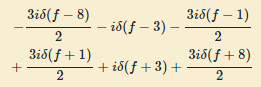
Delta de dirac = inf en 8, -8, 3, -3, 1, -1

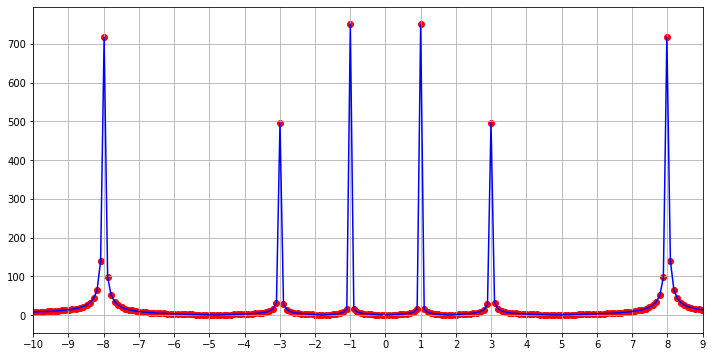

In [9]:
plt.figure(figsize=(12,6))
plt.plot(freq[:N//2],np.abs(x2_FFT[:N//2]), 'b-')
plt.scatter(freq[:N//2],np.abs(x2_FFT[:N//2]), color='red') 

plt.plot(freq[N//2:],np.abs(x2_FFT[N//2:]), 'b-')
plt.scatter(freq[N//2:],np.abs(x2_FFT[N//2:]), color='red')
plt.xlim(-9,9)
plt.xticks(np.arange(-10,10,1))
plt.grid()

## Transformadas inversas

In [10]:
x1_IFFT = ifft(x1_FFT)
x2_IFFT = ifft(x2_FFT)

C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'x2: 3sin(wt) + 2sin(3wt) + 3sin(8wt)')

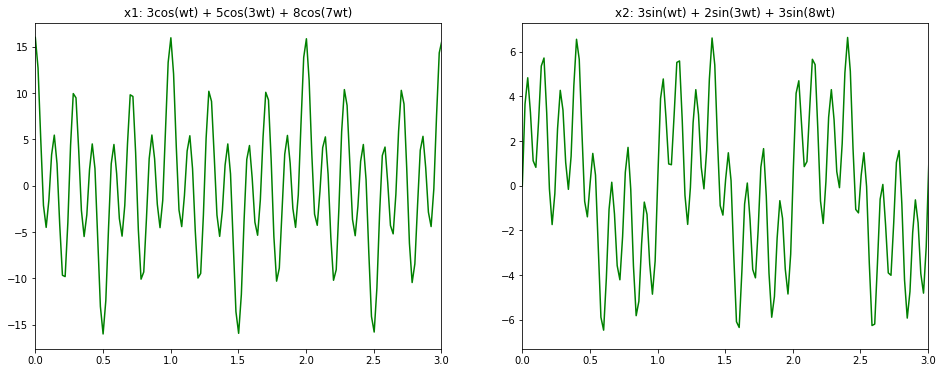

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
#plt.figure(figsize=(12,6))
ax1.plot(t,x1_IFFT, '-g')
ax1.set_xlim(0,3)
ax1.set_title("x1: 3cos(wt) + 5cos(3wt) + 8cos(7wt)")

ax2.plot(t,x2_IFFT, '-g')
ax2.set_xlim(0,3)
ax2.set_title("x2: 3sin(wt) + 2sin(3wt) + 3sin(8wt)")

In [12]:
print(len(x1_IFFT))
print(x1_IFFT)

500
[ 1.60000000e+01-7.10542736e-18j  1.27122577e+01+0.00000000e+00j
  5.01829399e+00-5.68434189e-17j -2.12360571e+00-1.42108547e-17j
 -4.49092718e+00+1.27897692e-16j -1.54318734e+00+0.00000000e+00j
  3.33706596e+00-6.25277607e-16j  5.46266910e+00+4.97379915e-16j
  2.39204449e+00+3.12638804e-16j -4.19209491e+00-2.52953214e-15j
 -9.65692219e+00-1.26476607e-15j -9.79861188e+00-5.68434189e-17j
 -3.96537866e+00-5.11590770e-16j  4.35813539e+00-9.66338121e-16j
  9.94650607e+00-1.95399252e-16j  9.48585647e+00-4.26325641e-16j
  3.84628621e+00-5.11590770e-16j -2.65941504e+00+5.68434189e-17j
 -5.47547005e+00+4.40536496e-16j -3.12323100e+00-4.26325641e-16j
  1.77594849e+00-2.64257828e-16j  4.51250570e+00+1.45319920e-17j
  1.85655356e+00-2.53770854e-16j -5.43449387e+00-1.46264438e-17j
 -1.30155922e+01-4.83817649e-17j -1.59912812e+01-1.64550438e-16j
 -1.23972659e+01-5.05419567e-16j -4.60364537e+00+7.32857531e-16j
  2.37787124e+00-1.59758285e-16j  4.45515592e+00-5.25696378e-16j
  1.30529452e+00-4.21

In [13]:
print(len(x1))
print(x1)

500
[ 1.60000000e+01  1.27122577e+01  5.01829399e+00 -2.12360571e+00
 -4.49092718e+00 -1.54318734e+00  3.33706596e+00  5.46266910e+00
  2.39204449e+00 -4.19209491e+00 -9.65692219e+00 -9.79861188e+00
 -3.96537866e+00  4.35813539e+00  9.94650607e+00  9.48585647e+00
  3.84628621e+00 -2.65941504e+00 -5.47547005e+00 -3.12323100e+00
  1.77594849e+00  4.51250570e+00  1.85655356e+00 -5.43449387e+00
 -1.30155922e+01 -1.59912812e+01 -1.23972659e+01 -4.60364537e+00
  2.37787124e+00  4.45515592e+00  1.30529452e+00 -3.54349509e+00
 -5.43592455e+00 -2.11520776e+00  4.53500818e+00  9.81386219e+00
  9.63482719e+00  3.56599500e+00 -4.74361367e+00 -1.00783136e+01
 -9.30105081e+00 -3.49825794e+00  2.91684980e+00  5.47440287e+00
  2.90254582e+00 -2.00296231e+00 -4.51968299e+00 -1.57708524e+00
  5.85154726e+00  1.33067389e+01  1.59651402e+01  1.20711676e+01
  4.19124050e+00 -2.61900593e+00 -4.40542833e+00 -1.06289500e+00
  3.74197883e+00  5.39519037e+00  1.82939556e+00 -4.87435312e+00
 -9.95631591e+00 -9.4

In [14]:
print(len(x1))
print(len(np.fft.rfft(x1)))
print(len(np.fft.ifft(np.fft.rfft(x1))))


500
251
251


In [15]:
print(len(x1))
print(len(x1_FFT))
print(len(x1_IFFT))


500
500
500


In [16]:
print(len(x1))
print(len(np.fft.fft(x1)))
print(len(np.fft.ifft(np.fft.fft(x1))))


500
500
500
